# Лабораторная работа "Краевая Задача"

Ищем периодическое с периодом 1 решение уравнения

$$y'' - P^2(x)y = f(x)$$

Используется разностная схема

$$\begin{cases}
\frac{y_1 - 2y_0 + y_{N - 1}}{h^2} - P^2(0)y_0 = f(0) \\
\frac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(nh)y_n = f(nh), n \in [1, N-2] \\
\frac{y_0 - 2y_{N-1} + y_{N - 2}}{h^2} - P^2((N-1)h)y_0 = f((N-1)h) \\
Nh = 1,
\end{cases}
$$,

получаемая из условий $$y_N = y_0, y_{-1} = y_{N-1}$$ и решаемая методом периодической прогонки.

**Шаг 1:**
Из исходной задачи строим систему отностительно неизвестных $Y = [y_0, y_1, ..., y_{N-1}]^T$

$$\begin{cases}
y_{N-1} - b_0y_0 + y_1 = \varphi_0 ~(1)\\
y_{n-1} - b_n y_n + y_{n+1} = \varphi_n~ (2)\\
y_{N - 2} - b_{N - 1} y_{N - 1} + y_0 = \varphi_{N - 1}~ (3)\\
b_n = 2 + h^2P^2(nh) \\
\varphi_n = h^2 f(nh)
\end{cases}
$$

В целом, эту систему уже можно решить через обращение исходной матрицы, однако это $O(N^3)$, что нехорошо. Данную задачу можно оптимизировать, используя модифицированную прогонку.

**Шаг 2:**
Ищем решение в виде $y_{n - 1} = \alpha_n y_n + \beta_n + \gamma_n y_{N - 1} ~(4)$. Преобразуем *(1)* к данному виду и получим $\alpha_1 = \gamma_1 = 1/b_0,~ \beta_1 = -\varphi_0 / b_0$. Подставим *(4)* в *(2)*, преобразуем к виду (4) и получим:

$$\begin{cases}
\alpha_{n + 1} = \frac{1}{b_n - \alpha_n} \\
\beta_{n+1} = \frac{\beta_n - \varphi_n}{b_n - \alpha_n} \\
\gamma_{n + 1} = \frac{\gamma_n}{b_n - \alpha_n} \\
n \in [1, N - 2]
\end{cases}$$

Далее вычисляем $\alpha_n, \beta_n, \gamma_n$ при $n \in [1, N - 1]$. Подставляем в *(4)* при $n = n - 1$, получаем $y_{N-2} = (\alpha_{N-1} + \gamma_{N -1})y_{N - 1} + \beta_{N - 1}$. Подставляем в *(3)* и получаем

$$\begin{cases}
y_{N - 1} = \mu_{N - 1}y_0 + \nu_{N-1} ~(5), \\
\mu_{N - 1} = \frac{-1}{\alpha_{N - 1} + \gamma_{N - 1} - b_{N - 1}} \\
\nu_{N - 1} = \frac{\varphi_{N - 1} - \beta_{N-1}}{\alpha_{N - 1} + \gamma_{N - 1} - b_{N - 1}}
\end{cases}$$

**Шаг 3:**
Ищем решение в виде $y_n = \mu_n y_0 + \nu_n ~(6)$. Подставим *(5)*, *(6)* в *(4)*, приведем к виду *(6)* и получим

$$\begin{cases}
y_{n - 1} = \mu_{n - 1}y_0 + \mu_{n - 1}~(7) \\
\mu_{n - 1} = \alpha_n \mu_n + \gamma_n \mu_{N-1} \\
\nu_{n - 1} = \alpha_n \nu_n + \gamma_n \nu_{N-1} + \beta_n \\
n \in [1, N - 1]
\end{cases}$$

Последовательно вычислим все $\mu_n, \nu_n$, начиная $N - 1$ и заканчивая $\mu_0, \nu_0$ включительно. Вычислим $y_0$, подставив $n=0$ в *(6)*:
$$y_0 = \frac{\nu_0}{1 - \mu_0}$$

Итого, у нас известен $y_0$ и $\mu_n,~ \nu_n, ~n \in [0, N-1]$. Значит по формуле *(6)* мы можем рассчитать все $y_n$.

**Алгоритм:**

1. Вычисляем $b_n = 2 + h^2P^2(nh), \varphi_n = h^2f(nh), ~n \in [0, N - 1]$.

2. Вычисляем $\alpha_1 = \gamma_1 = 1 / b_0,~\beta_1 = -\varphi_{0} / b_0$. Последовательно рассчитаем
$$\begin{cases}
\alpha_{n + 1} = \frac{1}{b_n - \alpha_n} \\
\beta_{n+1} = \frac{\beta_n - \varphi_n}{b_n - \alpha_n} \\
\gamma_{n + 1} = \frac{\gamma_n}{b_n - \alpha_n} \\
n \in [1, N - 2]
\end{cases}$$

3. Вычисляем $\mu_{N - 1} = \frac{-1}{\alpha_{N - 1} + \gamma_{N - 1} - b_{N - 1}},~\nu_{N - 1} = \frac{\varphi_{N - 1} - \beta_{N-1}}{\alpha_{N - 1} + \gamma_{N - 1} - b_{N - 1}}$. Последовательно рассчитаем
$$\begin{cases}
y_{n - 1} = \mu_{n - 1}y_0 + \mu_{n - 1}~(7) \\
\mu_{n - 1} = \alpha_n \mu_n + \gamma_n \mu_{N-1} \\
\nu_{n - 1} = \alpha_n \nu_n + \gamma_n \nu_{N-1} + \beta_n \\
n \in [1, N - 1]
\end{cases}$$

4. Вычислим $y_0 = \frac{\nu_0}{1 - \mu_0}$. Последовательно рассчитаем $y_n = \mu_n y_0 + \nu_n,~ n \in [1, N - 1]$.

> Итого получили алгоритм, работающий за $O(N)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Решение краевой задачи')

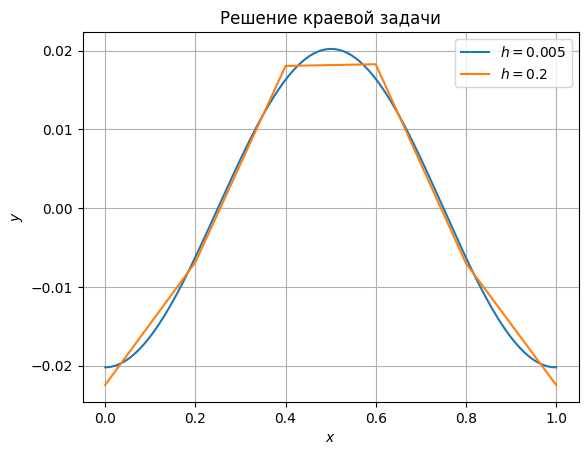

In [2]:
# Solving for (0, 1) 1-periodic solution of
#   y'' - y*P2(x) = f(x)
# where f(x), P2(x) are 1-periodic function
def solve(P2, f, h):
    CALC_TYPE = np.float64

    assert P2(0) == P2(1)
    assert f(0) == f(1)

    X = np.arange(0, 1, h, dtype=CALC_TYPE)
    N = len(X)

    b = 2 + h**2 * P2(X)
    phi = h**2 * f(X)

    alpha = np.zeros_like(X)
    beta  = np.zeros_like(X)
    gamma = np.zeros_like(X)

    alpha[1] = 1 / b[0]
    gamma[1] = 1 / b[0]
    beta[1] = -phi[0] / b[0]

    for i in range(1, N - 1):
        den = b[i] - alpha[i]
        alpha[i + 1] = 1 / den
        beta[i + 1] = (beta[i] - phi[i]) / den
        gamma[i + 1] = gamma[i] / den

    mu = np.zeros_like(X)
    nu = np.zeros_like(X)

    den = alpha[-1] + gamma[-1] - b[-1]
    mu[-1] = -1 / den
    nu[-1] = (phi[-1] - beta[-1]) / den

    for i in range(N - 1, 0, -1):
        mu[i - 1] = alpha[i] * mu[i] + gamma[i]*mu[-1]
        nu[i - 1] = alpha[i] * nu[i] + gamma[i]*nu[-1] + beta[i]

    Y = np.zeros_like(X)
    Y[0] = nu[0] / (1 - mu[0])

    for i in range(1, N):
        Y[i] = mu[i] * Y[0] + nu[i]

    X_ret = np.ndarray((N+1), dtype=CALC_TYPE)
    Y_ret = np.zeros_like(X_ret)

    X_ret[:-1] = X; X_ret[-1] = 1
    Y_ret[:-1] = Y; Y_ret[-1] = Y[0]

    return X_ret, Y_ret

def P2_task(X):
    return 10 + np.sin(2 * np.pi * X)

def f_task(X):
    return np.cos(2 * np.pi * X)

H = [0.005, 0.2]

for h in H:
    X, Y = solve(P2_task, f_task, h)
    plt.plot(X, Y, label=f"$h={h}$")

plt.grid()
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Решение краевой задачи")